# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.
1) From the selected treatments Capomulin and Ramicane reduces the size of tumors better. 
2) The Mouse weight also determined how big the tumor is and how the medicine effected it.
3) Tumor volume (mm3) decreased over time (based on timepoint) for mice involved in the Capomulin study on average

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_complete = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview 
mouse_metadata_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
num_mice = mouse_metadata_complete['Mouse ID'].nunique()
print(f'The number of unique mice is: {num_mice}')

The number of unique mice is: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = mouse_metadata_complete[mouse_metadata_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

In [5]:

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data = mouse_metadata_complete[mouse_metadata_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = mouse_metadata_complete.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')

cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(f'The number of unique mice in the cleaned DataFrame is: {num_mice_cleaned}')


The number of unique mice in the cleaned DataFrame is: 249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_data = cleaned_data.groupby('Drug Regimen')

In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

summary_statistics = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


In [11]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

In [12]:
# Assemble the resulting series into a single summary DataFrame.
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_advanced = cleaned_data.groupby('Drug Regimen').agg(
    **{
        'Mean Tumor Volume': ('Tumor Volume (mm3)', 'mean'),
        'Median Tumor Volume': ('Tumor Volume (mm3)', 'median'),
        'Tumor Volume Variance': ('Tumor Volume (mm3)', 'var'),
        'Tumor Volume Std. Dev.': ('Tumor Volume (mm3)', 'std'),
        'Tumor Volume SEM': ('Tumor Volume (mm3)', 'sem')
    }
).reset_index()

summary_statistics_advanced

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

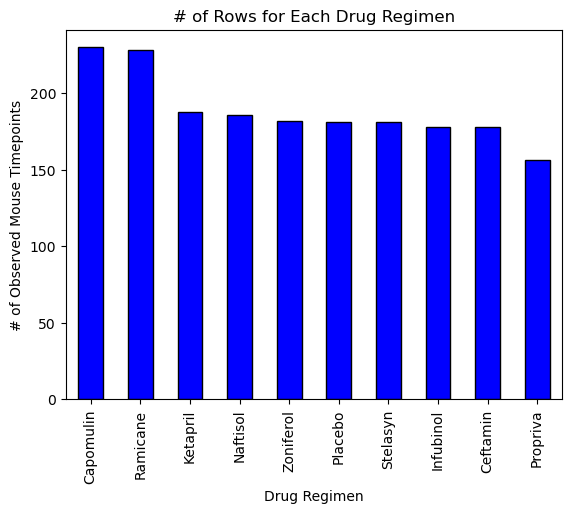

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_regimen = cleaned_data['Drug Regimen'].value_counts()


count_per_regimen.plot(kind='bar', color='blue', edgecolor='black')

plt.title('# of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

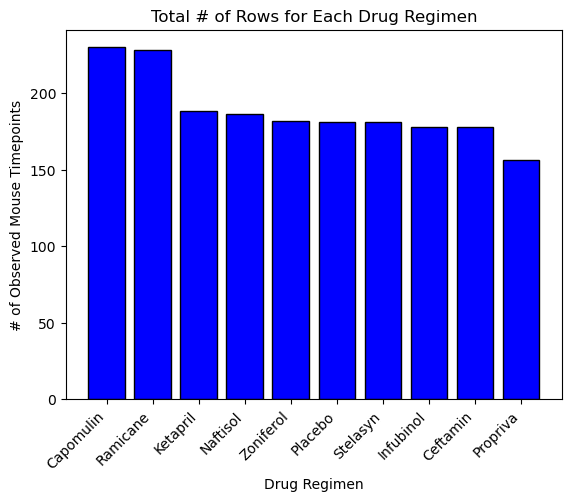

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(count_per_regimen.index, count_per_regimen, color='blue', edgecolor='black')

plt.title('Total # of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation=45, ha='right')

plt.show()

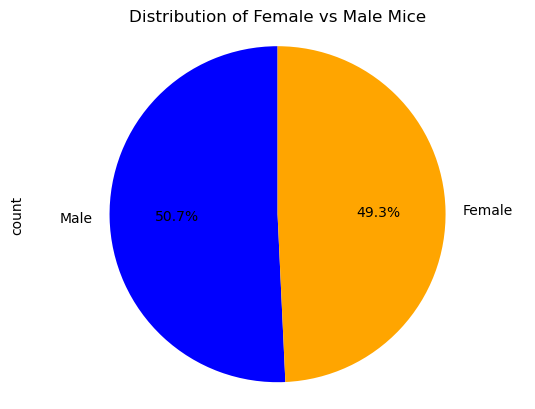

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_data['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

(-1.0999999924791486,
 1.0999999565358618,
 -1.099999963869275,
 1.0999999982794892)

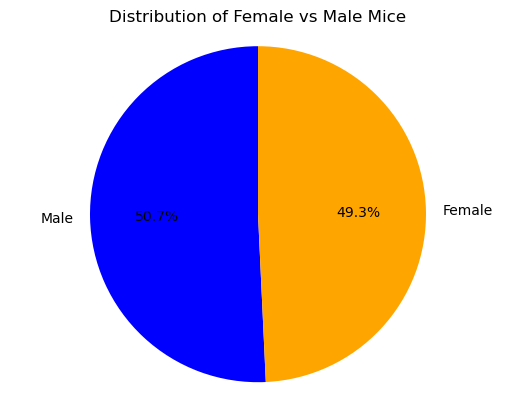

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = cleaned_data['Sex'].value_counts()

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selected_regimens_data = cleaned_data[cleaned_data['Drug Regimen'].isin(selected_regimens)]

In [19]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [20]:
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = selected_regimens_data.groupby('Mouse ID')['Timepoint'].max()

In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.DataFrame({'Timepoint': last_timepoint}).reset_index()
final_tumor_volume = pd.merge(final_timepoint_df, selected_regimens_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
cleaned_data['Drug Regimen'].unique()
drug_list = cleaned_data['Drug Regimen'].unique()

 
    

#create empty list to fill with tumor col data (for plotting)
empty_list = []

#Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_list:
   final_tumor_vol = cleaned_data.loc[cleaned_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
   empty_list.append(final_tumor_vol)

quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q



   # print(drug)
    # Locate the rows which contain mice on each drug and get tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds 
lower_bound = lower_q - 1.5 * iqr
upper_bound = upper_q + 1.5 * iqr

outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]


print(f"\nResults for {drug}:")
print(f"IQR for {drug}: {iqr}")
print(f"Lower Bound for {drug}: {lower_bound}")
print(f"Upper Bound for {drug}: {upper_bound}")
print(f"Potential outliers for {drug}: {outliers.tolist()}")


Results for Naftisol:
IQR for Naftisol: 12.677160092499996
Lower Bound for Naftisol: 28.270133771250006
Upper Bound for Naftisol: 78.97877414124999
Potential outliers for Naftisol: []


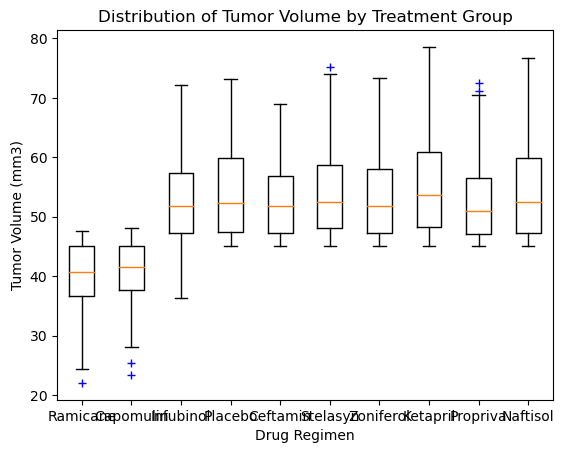

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(empty_list, labels=drug_list, sym='b+')

plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

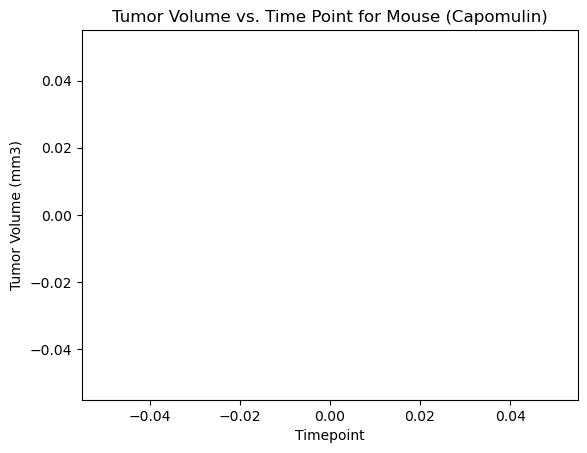

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = 'your_mouse_id_here'
mouse_data_capomulin = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == selected_mouse_id)]
plt.plot(mouse_data_capomulin['Timepoint'], mouse_data_capomulin['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Time Point for Mouse (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show

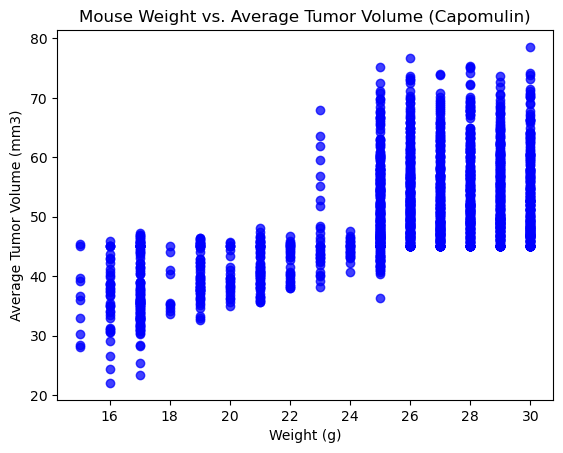

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(cleaned_data['Weight (g)'], cleaned_data['Tumor Volume (mm3)'], color='blue', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

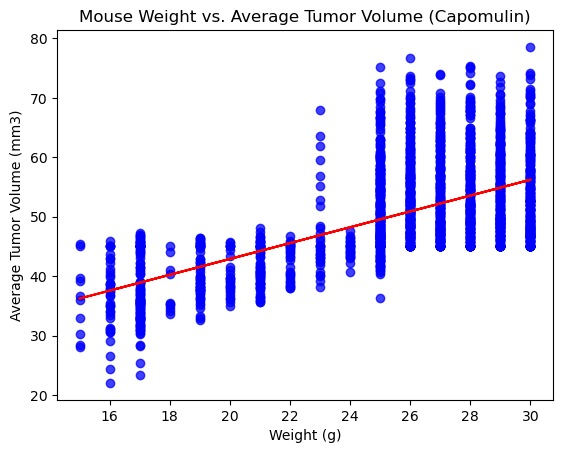

In [43]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient = np.corrcoef(cleaned_data['Weight (g)'], cleaned_data['Tumor Volume (mm3)'])[0, 1]
slope, intercept, r_value, p_value, std_err = st.linregress(cleaned_data['Weight (g)'], cleaned_data['Tumor Volume (mm3)'])

plt.scatter(cleaned_data['Weight (g)'], cleaned_data['Tumor Volume (mm3)'], color='blue', alpha=0.75)
regress_values = slope * cleaned_data['Weight (g)'] + intercept
plt.plot(cleaned_data['Weight (g)'], regress_values, color='red')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# for mouse weight and average observed tumor volume for the entire Capomulin regimen
